<a href="https://colab.research.google.com/github/sh1var3ddy/CNN/blob/main/vnr_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [64]:
df = pd.read_csv('/content/vnr_dataset.csv',index_col=0)

In [65]:
df.head()

,cricket,Singing,volleyball,badmintion,dance,football,basketball,drama
user_id,,,,,,,,
1,10,10,2,10,2,5,9,8
2,5,8,2,10,5,10,5,5
3,4,1,5,2,4,8,3,8
4,9,3,9,2,5,10,2,3
5,10,9,9,8,5,5,6,1


In [66]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [67]:
pca = PCA()
pca.fit(df_std)

PCA()

In [68]:
pca.explained_variance_ratio_

array([0.12893843, 0.12782909, 0.12718526, 0.12629223, 0.12506331,
       0.12304167, 0.12175121, 0.1198988 ])

Text(0, 0.5, 'cumulative explained varience')

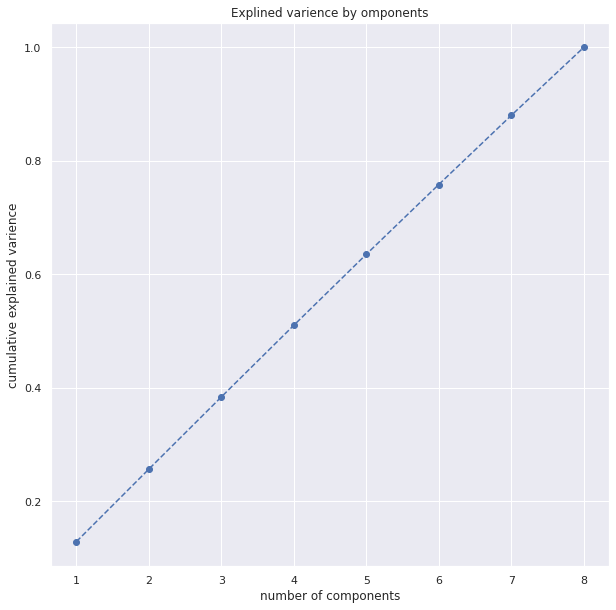

In [69]:
plt.figure(figsize=(10,10))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explined varience by omponents')
plt.xlabel('number of components')
plt.ylabel('cumulative explained varience')

In [94]:
pca=PCA(n_components=3)

In [95]:
pca.fit(df_std)

PCA(n_components=3)

In [96]:
pca.transform(df_std)

array([[ 0.76025539,  1.22991939,  1.71001374],
       [ 0.32349189,  0.02446682, -0.14010259],
       [ 1.64757835, -1.04858592, -0.85864103],
       ...,
       [ 0.35087314, -1.35611179,  1.97596512],
       [-2.51068036, -0.30741496,  0.75015429],
       [ 0.54316259,  0.17717517,  1.14835323]])

In [97]:
scores_pca = pca.transform(df_std)

In [98]:
wcss=[]
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

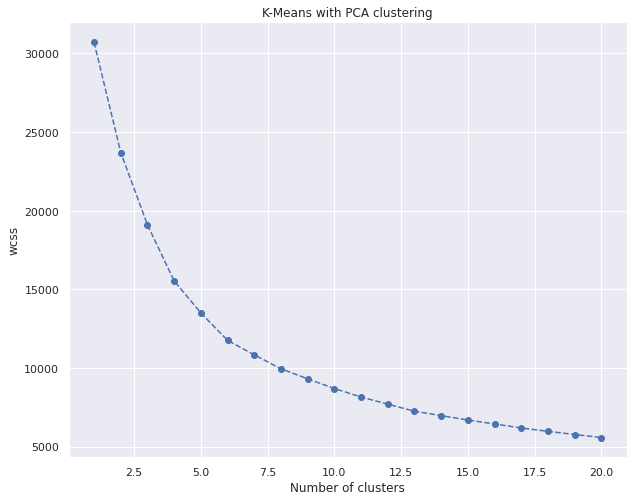

In [99]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('K-Means with PCA clustering')
plt.show()

In [100]:
kmeans_pca = KMeans(n_clusters=7,init='k-means++',random_state=0)

In [101]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=7, random_state=0)

In [102]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['c1','c2','c3']
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [103]:
df_segm_pca_kmeans.head()

,cricket,Singing,volleyball,badmintion,dance,football,basketball,drama,c1,c2,c3,Segment K-Means PCA
0,10,10,2,10,2,5,9,8,0.760255,1.229919,1.710014,1
1,5,8,2,10,5,10,5,5,0.323492,0.024467,-0.140103,0
2,4,1,5,2,4,8,3,8,1.647578,-1.048586,-0.858641,0
3,9,3,9,2,5,10,2,3,0.645272,-1.331367,0.346014,6
4,10,9,9,8,5,5,6,1,-1.406442,0.216002,1.436598,3


In [104]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({0:'f',1:'s',2:'t',3:'fo',4:'fi',5:'si',6:'se',7:'ei'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


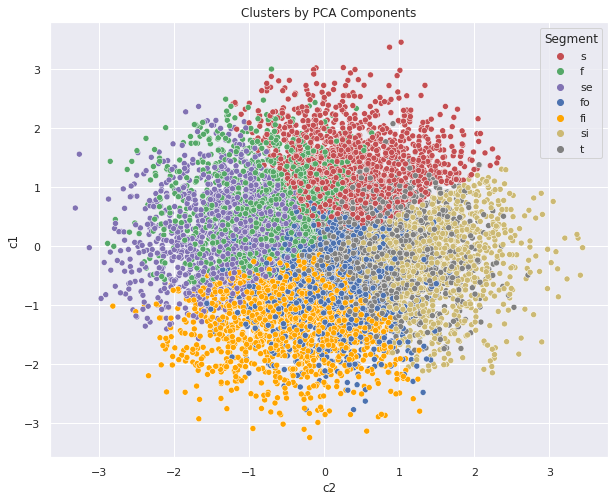

In [105]:
x_axis = df_segm_pca_kmeans['c2']
y_axis = df_segm_pca_kmeans['c1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['Segment'],palette=['r','g','m','b','orange','y','Grey'])
plt.title('Clusters by PCA Components')
plt.show()

In [114]:
y = kmeans_pca.fit_predict(df[:])
y

array([0, 1, 4, ..., 4, 2, 0], dtype=int32)

In [115]:
df.iloc[1]

cricket        5
Singing        8
volleyball     2
badmintion    10
dance          5
football      10
basketball     5
drama          5
Name: 2, dtype: int64

In [116]:
print(len(y))

10000


In [117]:
df['cluster_no']=y

In [118]:
df.head()

,cricket,Singing,volleyball,badmintion,dance,football,basketball,drama,cluster_no
user_id,,,,,,,,,
1,10,10,2,10,2,5,9,8,0
2,5,8,2,10,5,10,5,5,1
3,4,1,5,2,4,8,3,8,4
4,9,3,9,2,5,10,2,3,1
5,10,9,9,8,5,5,6,1,0
